In [10]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject

In [11]:
using ModelingToolkit, OrdinaryDiffEq, DifferentialEquations, LinearAlgebra, SparseArrays

In [12]:
using CUDA, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [13]:
using ComputationalResources

In [15]:
addresource(CUDALibs)

Set{Type} with 2 elements:
  CUDALibs
  CPU1

In [ ]:
# using ArrayFire;
# addresource(ArrayFireLibs);

In [ ]:
img = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);

In [ ]:
i_cu = CuArray(img)

In [42]:
k = Kernel.gaussian(0.5f0)

5×5 OffsetArray(::Array{Float32,2}, -2:2, -2:2) with eltype Float32 with indices -2:2×-2:2:
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 0.000207549  0.083731    0.618693     0.083731    0.000207549
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8

In [43]:
k_cu = CuArray(collect(k))

5×5 CuArray{Float32,2,Nothing}:
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 0.000207549  0.083731    0.618693     0.083731    0.000207549
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8

In [44]:
k_cu_c = centered(k_cu)

5×5 OffsetArray(::CuArray{Float32,2,Nothing}, -2:2, -2:2) with eltype Float32 with indices -2:2×-2:2:
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 0.000207549  0.083731    0.618693     0.083731    0.000207549
 2.80886f-5   0.0113318   0.083731     0.0113318   2.80886f-5
 6.96248f-8   2.80886f-5  0.000207549  2.80886f-5  6.96248f-8

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/X4SqE/src/host/indexing.jl:43


In [45]:
o1 = similar(img);
o2 = similar(i_cu);
o3 = similar(i_cu);
o4 = similar(i_cu);
o5 = similar(i_cu);

In [46]:
@benchmark o1 = imfilter(img, k, "circular")

BenchmarkTools.Trial: 
  memory estimate:  103.48 KiB
  allocs estimate:  48
  --------------
  minimum time:     327.428 μs (0.00% GC)
  median time:      341.870 μs (0.00% GC)
  mean time:        347.971 μs (1.61% GC)
  maximum time:     6.001 ms (93.20% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [47]:
@benchmark o2 = imfilter(i_cu, k, "circular")

BenchmarkTools.Trial: 
  memory estimate:  8.41 MiB
  allocs estimate:  91686
  --------------
  minimum time:     1.029 s (0.00% GC)
  median time:      1.032 s (0.00% GC)
  mean time:        1.033 s (0.00% GC)
  maximum time:     1.038 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [48]:
@benchmark o3 = imfilter(i_cu, k_cu, "circular")

┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1522 [inlined]
└ @ Core /mnt/storage_1/users/cullinanen/.julia/packages/ImageFiltering/LvWYb/src/imfilter.jl:1522
┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1522 [inlined]
└ @ Core /mnt/storage_1/users/cullinanen/.julia/packages/ImageFiltering/LvWYb/src/imfilter.jl:1522


BenchmarkTools.Trial: 
  memory estimate:  8.44 MiB
  allocs estimate:  91887
  --------------
  minimum time:     1.026 s (0.00% GC)
  median time:      1.027 s (0.00% GC)
  mean time:        1.028 s (0.00% GC)
  maximum time:     1.034 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [49]:

@benchmark o3 = imfilter(i_cu, k_cu_c, "circular")

BenchmarkTools.Trial: 
  memory estimate:  8.41 MiB
  allocs estimate:  91711
  --------------
  minimum time:     1.027 s (0.00% GC)
  median time:      1.029 s (0.00% GC)
  mean time:        1.030 s (0.00% GC)
  maximum time:     1.033 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [50]:

@benchmark imfilter!(o3, i_cu, k_cu, "circular")

BenchmarkTools.Trial: 
  memory estimate:  8.44 MiB
  allocs estimate:  91884
  --------------
  minimum time:     1.019 s (0.00% GC)
  median time:      1.023 s (0.00% GC)
  mean time:        1.025 s (0.00% GC)
  maximum time:     1.032 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [51]:

@benchmark imfilter!(o3, i_cu, k_cu_c, "circular")

BenchmarkTools.Trial: 
  memory estimate:  8.41 MiB
  allocs estimate:  91708
  --------------
  minimum time:     1.021 s (0.00% GC)
  median time:      1.024 s (0.00% GC)
  mean time:        1.025 s (0.00% GC)
  maximum time:     1.032 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [52]:

@benchmark imfilter!(o3, i_cu, k_cu, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  9.27 MiB
  allocs estimate:  101064
  --------------
  minimum time:     1.080 s (0.00% GC)
  median time:      1.086 s (0.00% GC)
  mean time:        1.084 s (0.00% GC)
  maximum time:     1.087 s (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [53]:
@benchmark imfilter!(CUDALibs(Algorithm.FFT()),o3, i_cu, k_cu, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  14.13 MiB
  allocs estimate:  154305
  --------------
  minimum time:     1.707 s (0.00% GC)
  median time:      1.707 s (0.00% GC)
  mean time:        1.709 s (0.00% GC)
  maximum time:     1.712 s (0.00% GC)
  --------------
  samples:          3
  evals/sample:     1

In [54]:

@benchmark imfilter!(CUDALibs(Algorithm.FIR()),o3, i_cu, k_cu, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  14.06 MiB
  allocs estimate:  153449
  --------------
  minimum time:     1.701 s (0.00% GC)
  median time:      1.701 s (0.00% GC)
  mean time:        1.701 s (0.00% GC)
  maximum time:     1.702 s (0.00% GC)
  --------------
  samples:          3
  evals/sample:     1

In [55]:

@benchmark imfilter!(CUDALibs(Algorithm.IIR()),o3, i_cu, k_cu, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  14.06 MiB
  allocs estimate:  153449
  --------------
  minimum time:     1.700 s (0.00% GC)
  median time:      1.724 s (0.00% GC)
  mean time:        1.716 s (0.00% GC)
  maximum time:     1.725 s (0.00% GC)
  --------------
  samples:          3
  evals/sample:     1

In [70]:

@benchmark imfilter!(CUDALibs(Algorithm.FFT()),o3, i_cu, k_cu_c, Fill(0.0f0)) 

BenchmarkTools.Trial: 
  memory estimate:  14.11 MiB
  allocs estimate:  154127
  --------------
  minimum time:     1.708 s (0.00% GC)
  median time:      1.709 s (0.00% GC)
  mean time:        1.709 s (0.00% GC)
  maximum time:     1.711 s (0.00% GC)
  --------------
  samples:          3
  evals/sample:     1

In [41]:
CUDA.allowscalar(true)
# CUDA.allowscalar(false)

In [56]:
@benchmark imfilter!(CUDALibs(Algorithm.FFT()),o3, img, k, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  1.01 MiB
  allocs estimate:  10034
  --------------
  minimum time:     72.395 ms (0.00% GC)
  median time:      73.971 ms (0.00% GC)
  mean time:        74.000 ms (0.00% GC)
  maximum time:     75.568 ms (0.00% GC)
  --------------
  samples:          68
  evals/sample:     1

In [57]:

@benchmark imfilter!(CUDALibs(Algorithm.FFT()),o1, img, k, Fill(0)) 


BenchmarkTools.Trial: 
  memory estimate:  95.33 KiB
  allocs estimate:  34
  --------------
  minimum time:     340.993 μs (0.00% GC)
  median time:      347.454 μs (0.00% GC)
  mean time:        353.416 μs (1.41% GC)
  maximum time:     5.949 ms (93.16% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [59]:
@benchmark imfilter!(o1, img, k, Fill(0)) 

BenchmarkTools.Trial: 
  memory estimate:  62.25 KiB
  allocs estimate:  39
  --------------
  minimum time:     359.936 μs (0.00% GC)
  median time:      375.247 μs (0.00% GC)
  mean time:        379.589 μs (0.97% GC)
  maximum time:     6.543 ms (93.86% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [60]:
@benchmark imfilter!(CUDALibs(Algorithm.FFT()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  97.42 KiB
  allocs estimate:  41
  --------------
  minimum time:     306.355 μs (0.00% GC)
  median time:      308.568 μs (0.00% GC)
  mean time:        314.353 μs (1.58% GC)
  maximum time:     5.919 ms (93.46% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [61]:

@benchmark imfilter!(CUDALibs(Algorithm.IIR()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  90.17 KiB
  allocs estimate:  33
  --------------
  minimum time:     303.240 μs (0.00% GC)
  median time:      306.654 μs (0.00% GC)
  mean time:        311.427 μs (1.40% GC)
  maximum time:     5.792 ms (94.10% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [63]:
@benchmark imfilter!(CUDALibs(Algorithm.FIR()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  90.17 KiB
  allocs estimate:  33
  --------------
  minimum time:     303.259 μs (0.00% GC)
  median time:      307.034 μs (0.00% GC)
  mean time:        312.344 μs (1.42% GC)
  maximum time:     6.321 ms (95.04% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [64]:
using ArrayFire;
addresource(ArrayFireLibs);

ArrayFire v3.5.1 (CUDA, 64-bit Linux, build 0a675e8)
Platform: CUDA Toolkit 8, Driver: 384.130
[0] Tesla K40c, 11440 MB, CUDA Compute 3.5


In [65]:
@benchmark imfilter!(ArrayFireLibs(Algorithm.FIR()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  90.17 KiB
  allocs estimate:  33
  --------------
  minimum time:     304.044 μs (0.00% GC)
  median time:      307.445 μs (0.00% GC)
  mean time:        312.879 μs (1.45% GC)
  maximum time:     6.132 ms (93.90% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [66]:

@benchmark imfilter!(ArrayFireLibs(Algorithm.IIR()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  90.17 KiB
  allocs estimate:  33
  --------------
  minimum time:     303.343 μs (0.00% GC)
  median time:      306.911 μs (0.00% GC)
  mean time:        314.256 μs (1.71% GC)
  maximum time:     14.195 ms (97.41% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [67]:

@benchmark imfilter!(ArrayFireLibs(Algorithm.FFT()),o1, img, k, "circular") 

BenchmarkTools.Trial: 
  memory estimate:  97.42 KiB
  allocs estimate:  41
  --------------
  minimum time:     325.357 μs (0.00% GC)
  median time:      331.160 μs (0.00% GC)
  mean time:        339.298 μs (1.78% GC)
  maximum time:     14.923 ms (97.35% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [68]:
@benchmark imfilter!(ArrayFireLibs(Algorithm.FFT()),o1, img, k, Fill(0.0f0)) 

BenchmarkTools.Trial: 
  memory estimate:  95.33 KiB
  allocs estimate:  34
  --------------
  minimum time:     338.313 μs (0.00% GC)
  median time:      343.034 μs (0.00% GC)
  mean time:        350.778 μs (1.43% GC)
  maximum time:     11.104 ms (96.45% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [73]:
size(k)

(5, 5)

In [83]:
i_con = reshape(img, size(img)[1], size(img)[2],1,1);
k_con = reshape(k,size(k)[1], size(k)[2],1,1);
o_con = similar(i_con);

In [91]:
i_cu_co = reshape(i_cu, size(i_cu)[1], size(i_cu)[2],1,1);
k_cu_co = reshape(k_cu,size(k_cu)[1], size(k_cu)[2],1,1);
o_cu_co = similar(i_cu_co);

In [94]:
@benchmark o_con = NNlib.conv(i_con, k_con, pad=2)

BenchmarkTools.Trial: 
  memory estimate:  1018.97 KiB
  allocs estimate:  57
  --------------
  minimum time:     601.087 μs (0.00% GC)
  median time:      662.264 μs (0.00% GC)
  mean time:        722.104 μs (7.30% GC)
  maximum time:     14.742 ms (95.28% GC)
  --------------
  samples:          6888
  evals/sample:     1

In [90]:

@benchmark  NNlib.conv!(o_con, i_con, k_con, pad=2)

MethodError: MethodError: no method matching conv!(::Array{Float32,4}, ::Array{Float32,4}, ::Array{Float32,4}; pad=2)
Closest candidates are:
  conv!(::AbstractArray{yT,4}, ::AbstractArray{xT,4}, ::AbstractArray{wT,4}, !Matched::ConvDims; kwargs...) where {yT, xT, wT} at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/conv.jl:148
  conv!(::AbstractArray{yT,N}, ::AbstractArray{T1,N}, ::AbstractArray{T2,N}, !Matched::ConvDims; kwargs...) where {yT, T1, T2, N} at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/conv.jl:206

In [86]:
o_con_ = NNlib.conv(i_con, k_con, pad=2);
size(o_con_)

(100, 100, 1, 1)

In [87]:
size(o_con)

(100, 100, 1, 1)

In [92]:
@benchmark o_cu_co = NNlib.conv(i_cu_co, k_cu_co, pad=2)

BenchmarkTools.Trial: 
  memory estimate:  6.78 KiB
  allocs estimate:  155
  --------------
  minimum time:     55.692 μs (0.00% GC)
  median time:      63.603 μs (0.00% GC)
  mean time:        62.694 μs (0.00% GC)
  maximum time:     577.258 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

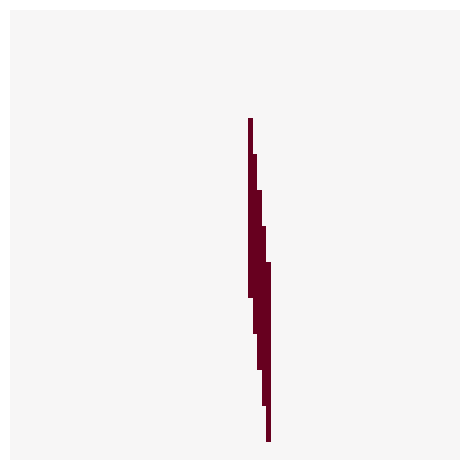

In [99]:
Utils.plot_rb(o_cu_co[:,:,1,1], save=false)

In [98]:
Utils.plot_rb(o_con[:,:,1,1], save=false)

ArgumentError: ArgumentError: Image has max 231.72046,outside range

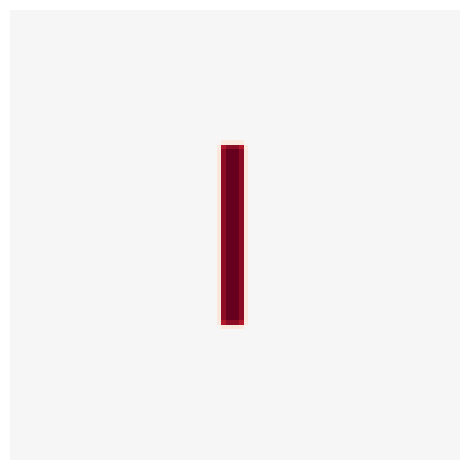

In [101]:
o_con_f = similar(i_con)
o_con_f = NNlib.conv(i_con, reflect(k_con), pad=2);
Utils.plot_rb(o_con_f[:,:,1,1], save=false)

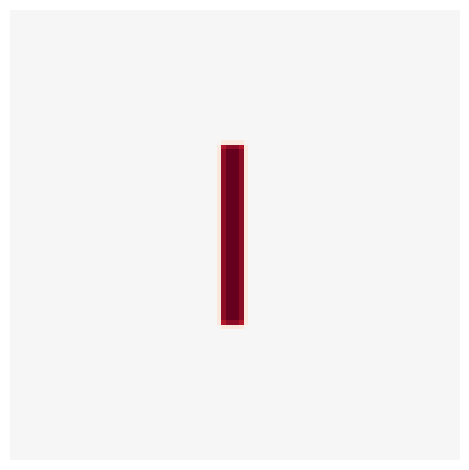

In [104]:
Utils.plot_rb(o1, axMax = 1.0001, save=false)

In [115]:
o1 ≈ o_con_f[:,:,1,1]

true

In [110]:
findmax(abs.(o1.-o_con_f))

(7.1525574f-7, CartesianIndex(33, 51, 1, 1))

In [111]:
o_con_fl = NNlib.conv(i_con, k_con, pad=2, flipped=true);

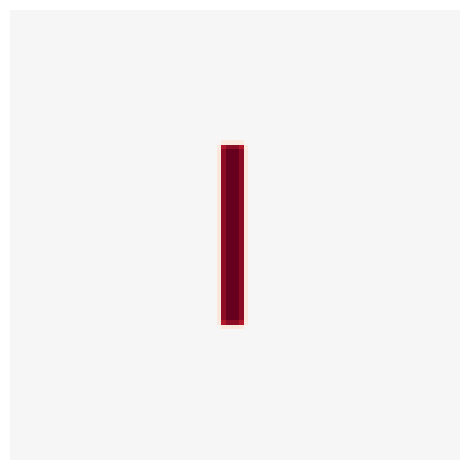

In [114]:
Utils.plot_rb(o_con_fl[:,:,1,1], save=false)

In [116]:
o1 ≈ o_con_fl[:,:,1,1]

true

In [117]:
7>>1

3

In [118]:
19>>1

9

In [119]:
o_con_fl = NNlib.conv(i_con, k_con, pad=(size(k_con)[1]>>1, size(k_con)[2]>>1), flipped=true);

In [152]:
function reshape2d_4d(out::AbstractArray, img::AbstractArray, p::NamedTuple)
    out = reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

In [135]:
i_4d = reshape(img,100,100,1,1)
reshape2d_4d!(i_4d, img, p);

In [139]:
out = similar(i_4d);

In [140]:
@benchmark reshape4d_ij11!(out, img, p)

BenchmarkTools.Trial: 
  memory estimate:  128 bytes
  allocs estimate:  2
  --------------
  minimum time:     126.851 ns (0.00% GC)
  median time:      136.686 ns (0.00% GC)
  mean time:        165.037 ns (13.32% GC)
  maximum time:     30.922 μs (99.41% GC)
  --------------
  samples:          10000
  evals/sample:     893

In [149]:
function conv!(out::AbstractArray, img::AbstractArray, kern::AbstractArray, p::NamedTuple)
    out = NNlib.conv(img, kern, pad=(size(kern)[1]>>1, size(kern)[2]>>1), flipped=true)
    return nothing
end

conv! (generic function with 1 method)

In [161]:
function conva!(out::AbstractArray, img::AbstractArray, kern::AbstractArray, p::NamedTuple)
    out = NNlib.conv(reshape2d_4d(out, img,p), kern, pad=(size(kern)[1]>>1, size(kern)[2]>>1), flipped=true)
    return nothing
end

conva! (generic function with 1 method)

In [162]:
@benchmark conv!(out, i_4d, k_con,p)

BenchmarkTools.Trial: 
  memory estimate:  1018.95 KiB
  allocs estimate:  56
  --------------
  minimum time:     634.150 μs (0.00% GC)
  median time:      660.821 μs (0.00% GC)
  mean time:        721.701 μs (8.04% GC)
  maximum time:     11.191 ms (93.84% GC)
  --------------
  samples:          6900
  evals/sample:     1

In [163]:
@benchmark conva!(out, img,  k_con,p)

BenchmarkTools.Trial: 
  memory estimate:  1019.08 KiB
  allocs estimate:  58
  --------------
  minimum time:     634.983 μs (0.00% GC)
  median time:      661.186 μs (0.00% GC)
  mean time:        719.360 μs (7.93% GC)
  maximum time:     14.697 ms (94.16% GC)
  --------------
  samples:          6923
  evals/sample:     1